In [65]:
#imports 

import os
import sys

from PIL import Image
import numpy as np
import skimage 
from skimage import io, color, filters, feature
import matplotlib.pyplot as plt

%matplotlib inline


In [66]:
#Constants:
#data wd:
WD = '/Users/nikhilarora/data/fydp/sb_images'


In [67]:
skimage.__version__

'0.13.0'

In [68]:
def rev_img(img):
    """reverse img"""
    rev_img = []
    for item in reversed(img):
        rev_img.append(item)
    return np.asarray(rev_img)

def rgb_2_gray(img):
    """converts rgb to grayscale"""
    return np.uint8(color.rgb2gray(img) * 255)


In [69]:
# grab the image and apply required transformations:
img_car = io.imread(os.path.join(WD + '/IMG_9767.JPG'))
img_ncar = io.imread(WD + '/IMG_9769.JPG')

img_car = rev_img(img_car) #reverse image
img_car_gs = rgb_2_gray(img_car) #grey out image
img_ncar = rev_img(img_ncar) #reverse image
img_ncar_gs = rgb_2_gray(img_ncar) #grey out image



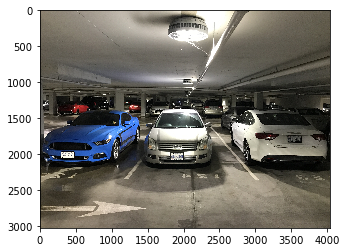

In [70]:
#plot image:
plt.imshow(img_car)

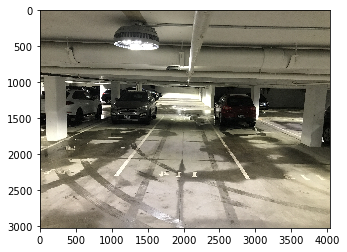

In [71]:
plt.imshow(img_ncar)

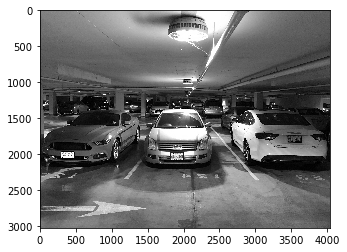

In [72]:
#plot greyed out img:
plt.imshow(img_car_gs, cmap='gray')


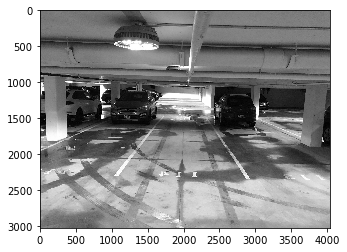

In [81]:
plt.imshow(img_ncar_gs, cmap='gray')


In [86]:
img_copy = img_ncar_gs.copy()

(3024, 4032)
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ..., 147 146 145]
 [  0   0   0 ..., 144 143 144]
 [  0   0   0 ..., 146 145 145]]


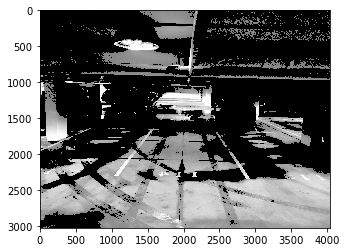

In [87]:
img_copy[img_ncar_gs < 130] = 0
print(img_copy.shape)
print(img_copy)
plt.imshow(img_copy, cmap='gray')

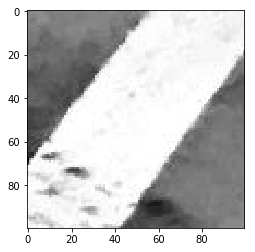

In [43]:
plt.imshow(img_ncar_gs[2000:2500,750:1250][200:300,300:400],cmap='gray')

(20, 20)

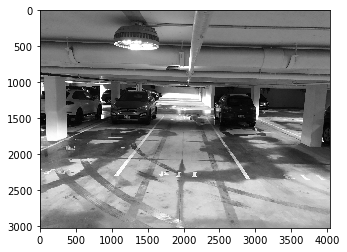

In [52]:
# try to remove some noise using median filter:
img_ncar_denoised = skimage.filters.median(img_ncar_gs, selem=np.ones((5,5)))
plt.imshow(img_ncar_denoised, cmap='gray')

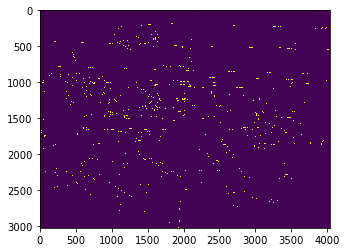

In [40]:
# build edge map of img:

img_edges = skimage.feature.canny(img_ncar_gs, sigma=3)
plt.imshow(img_edges)

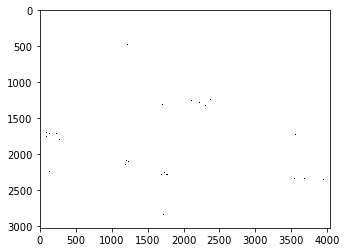

In [60]:
mask = img_ncar_gs < 225
img_ncar_gs[mask] = 0
plt.imshow(img_ncar_gs, cmap='gray')

In [121]:
threshold_value = filters.threshold_otsu(img_car)
threshold_value

/Users/nikhilarora/anaconda/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (3024, 4032, 3) looks like an RGB image
  warn(msg.format(image.shape))


111